# Домашно (Микрочипове)

In [1]:
# Първо включваме всички библиотеки които ще са ни необходими
%matplotlib inline
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import scipy.optimize as opt  
import os  

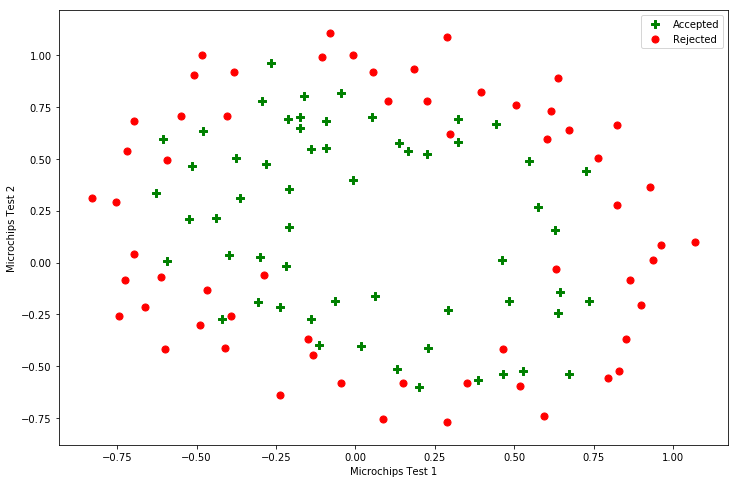

In [12]:
path = os.getcwd() + '/microchips.txt'  
data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Result'])

positive = data[data['Result'].isin([1])]  
negative = data[data['Result'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  

ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='g', marker='P', label='Accepted')  
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='o', label='Rejected')  
ax.legend()  
ax.set_xlabel('Microchips Test 1')  
ax.set_ylabel('Microchips Test 2')  
plt.show()

Един от начините да фитнем данните по-добре е да създадем повече атрибути за всеки пример. Това може да стане като създадем нови полиномиални атрибути от по-висока степен от съществуващите атрибути (данни).
Например можем да създадем допънителни полиноми от втора до шеста степен от същестуващите атрибути x1 и x2. 

$$
{1, x_1, x_2, x_1^2, x_2^2, x_1 x_2, x_2^2, x_1^3, ..., x_2^6}$$

In [3]:
degree = 5  
x1 = data['Test 1']  
x2 = data['Test 2']

data.insert(3, 'Ones', 1)

for i in range(1, degree):  
    for j in range(0, i):
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data.drop('Test 1', axis=1, inplace=True)  
data.drop('Test 2', axis=1, inplace=True)

data.head()  

,Result,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [10]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

def cost_reg(theta, X, y, alpha):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (alpha / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

def gradient_reg(theta, X, y, alpha):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((alpha / len(X)) * theta[:,i])

    return grad

def predict(theta, X):  
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

# сетваме X и y (етикета е преместен в първата колона)
cols = data.shape[1]  
X = data.iloc[:,1:cols]  
y = data.iloc[:,0:1]

# конвертираме до numpy масиви и инициализираме масива theta
X = np.array(X.values)  
y = np.array(y.values)  
theta = np.zeros(11)

learningRate = 1

costReg(theta, X, y, learningRate)  

result = opt.fmin_tnc(func=cost_reg, x0=theta, fprime=gradient_reg, args=(X, y, learningRate))  
print(result)  

theta_min = np.matrix(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print 'accuracy = {0}%'.format(accuracy)  

(array([  0.35869749,  -3.22228456,  18.96928451,  -4.25736177,
        18.22948889,  20.3575801 ,   8.93903333, -43.77110815,
       -17.92257849, -50.73978939,  -2.83254623]), 101, 1)
accuracy = 91%
